In [35]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [36]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [37]:
df_france = country_df("auto_download/auto_download_files/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("auto_download/auto_download_files/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("auto_download/auto_download_files/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("auto_download/auto_download_files/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("auto_download/auto_download_files/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

2019 - 2020

In [38]:
df_teams_last_second = pd.read_csv('germany_stats/team_stats/germany-2-bundesliga-teams-2019-to-2020-stats.csv')

In [39]:
df_bielefeld = df_teams_last_second[df_teams_last_second['common_name']=='Arminia Bielefeld']

2018 - 2019

In [40]:
df_teams_last_first = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [41]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [42]:
df_teams_last_17_18 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [43]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [44]:
df_teams_last_16_17 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [45]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [46]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [47]:
df_league_climbers = pd.concat([df_nueremberg, df_bielefeld, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
# columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [48]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [49]:
# COMMENT OUT IF YOU WANT AA WITHOUT CLIMBERS
# df_total = df_european_leagues.copy()

In [50]:
df_total.shape

(105, 280)

In [51]:
from pandas.plotting import scatter_matrix

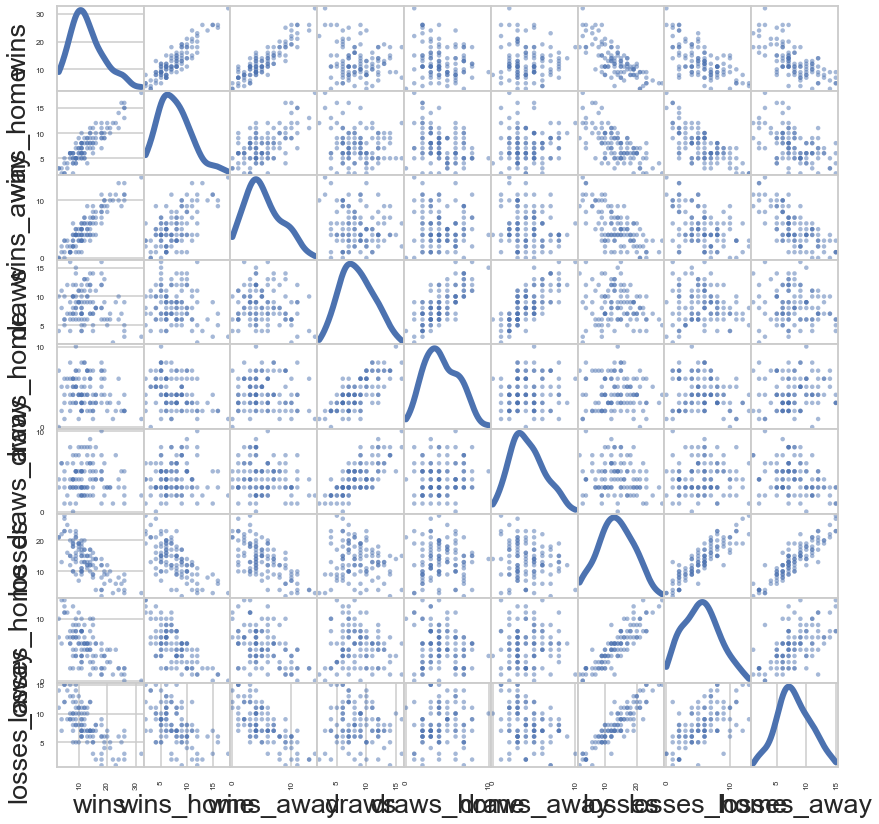

In [52]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [53]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [54]:
df_teams_numerical = df_all.iloc[8:,:]

In [55]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [56]:
X = df_norm.to_numpy()

## AA Analysis

In [57]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 3.5622785938030965
RSS = 3.089938101545076
RSS = 2.8920303190065826
RSS = 2.7537599290294157
RSS = 2.7123230810898935
RSS = 2.697400764686305
RSS = 2.689950263106466
RSS = 2.6851814281413575
RSS = 2.682296350603006
RSS = 2.6805837456051704
RSS = 2.6792770098264023
RSS = 2.6780883428667335
RSS = 2.67690027059845
RSS = 2.675537589460225
RSS = 2.6740237295074083
RSS = 2.672264714029444
RSS = 2.6697947147909504
RSS = 2.667327918669869
RSS = 2.665058870739829
RSS = 2.662829387103058
RSS = 2.659935912263974
RSS = 2.6555822318718283
RSS = 2.649018977791617
RSS = 2.640110675301482
RSS = 2.6309520612204755
RSS = 2.6235224789845883
RSS = 2.6170824423453993
RSS = 2.6118885303388004
RSS = 2.6080682587260062
RSS = 2.6051763422117253
RSS = 2.6034829982483627
RSS = 2.6024004106399286
RSS = 2.6017379228313344
RSS = 2.6011907943999195
RSS = 2.60098569368752
RSS = 2.6007255279128145
RSS = 2.6006398609333488
RSS = 2.6006213074386917
RSS = 2.600610010767549
RSS = 2.6004557771418635
RSS = 2.600390173

In [58]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

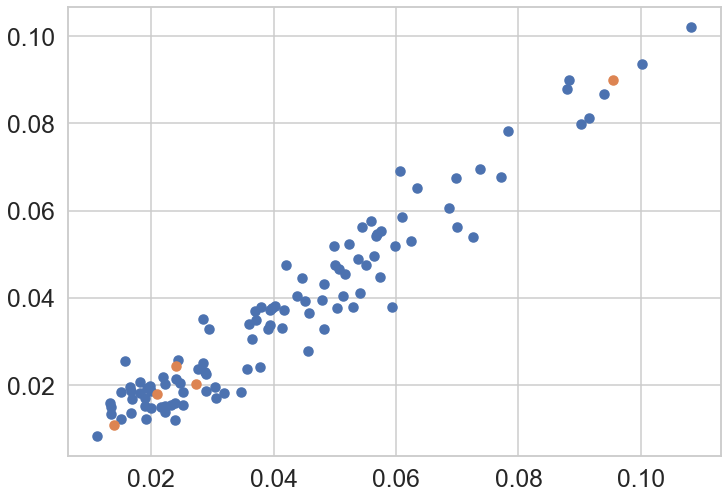

In [59]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

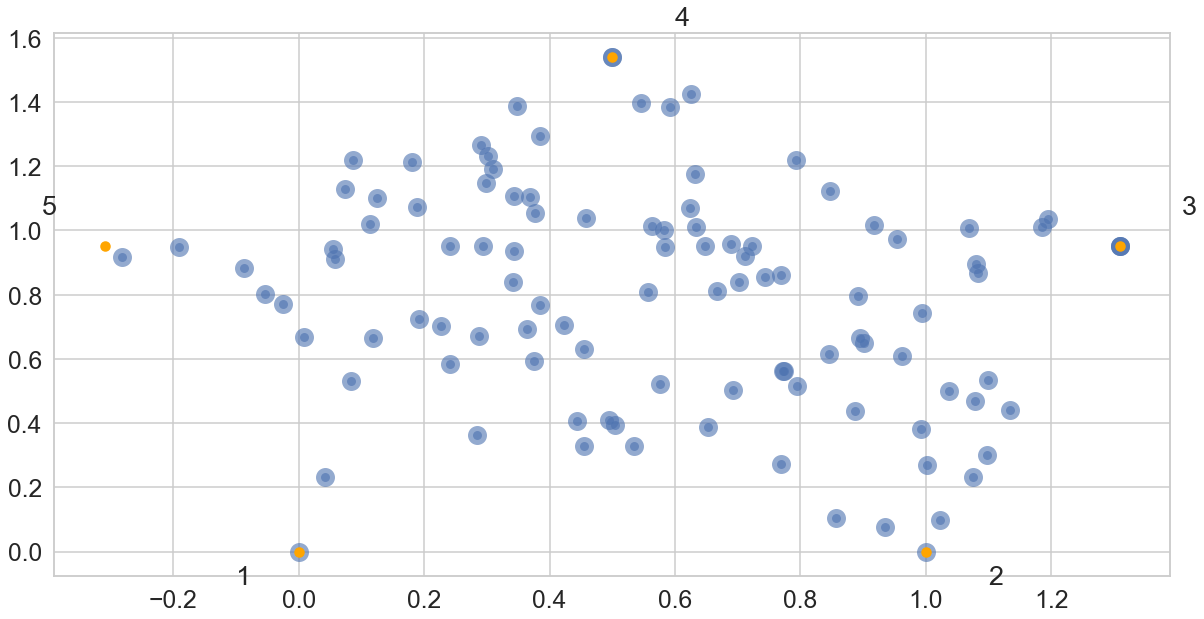

In [60]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [61]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [62]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.000 0.000 0.373 0.000 0.627 
1. FC Union Berlin                      0.312 0.024 0.393 0.001 0.271 
1. FSV Mainz 05                         0.000 0.000 0.399 0.151 0.450 
BVB 09 Borussia Dortmund                0.000 0.073 0.069 0.858 0.000 
Bayer 04 Leverkusen                     0.000 0.110 0.000 0.587 0.303 
Borussia VfL Mönchengladbach            0.044 0.099 0.000 0.437 0.420 
Düsseldorfer TuS Fortuna 1895           0.000 0.000 0.702 0.112 0.186 
Eintracht Frankfurt                     0.000 0.000 0.208 0.335 0.457 
FC Augsburg                             0.000 0.076 0.535 0.070 0.320 
FC Bayern München                       0.000 0.000 0.000 1.000 0.000 
FC Schalke 04                           0.000 0.151 0.498 0.093 0.258 
Hertha BSC                              0.263 0.000 0.281 0.000 0.456 
Rasen Ballsport Leipzig                 0.000 0.000 0.174 0.806 0.019 
SC Freiburg                             0.000 0.211 0.136 0.541 0.113 
SC Pad

## Merge Result with original dataframe

In [63]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [64]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [65]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.000221,0.000000,0.372669,0.000310,0.626800,Köln
1,0.311694,0.023898,0.392647,0.000576,0.271185,Union Berlin
2,0.000089,0.000000,0.398715,0.150831,0.450365,Mainz 05
3,0.000000,0.073178,0.068926,0.857896,0.000000,Borussia Dortmund
4,0.000066,0.110388,0.000022,0.586689,0.302835,Bayer Leverkusen
...,...,...,...,...,...,...
100,0.000000,0.000000,0.872868,0.101794,0.025338,Hannover 96
101,0.000000,0.000000,0.858560,0.141440,0.000000,Stuttgart
102,0.372425,0.085338,0.542237,0.000000,0.000000,Hamburger SV
103,0.354020,0.000000,0.645980,0.000000,0.000000,Darmstadt 98


## Save Result as Pickle file

In [66]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")